# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
ファストリ
日立
ＮＴＴ
キーエンス
任天堂
三井住友ＦＧ
リクルート
中外薬
ＫＤＤＩ
伊藤忠
三菱商
ＳＢ
東京海上
ＳＢＧ
東エレク
ＪＴ
みずほＦＧ
三菱重
三井物
信越化
ホンダ
武田
第一三共
富士通
ＯＬＣ
キヤノン
三菱電
['7203', '6758', '8306', '9983', '6501', '9432', '6861', '7974', '8316', '6098', '4519', '9433', '8001', '8058', '9434', '8766', '9984', '8035', '2914', '8411', '7011', '8031', '4063', '7267', '4502', '4568', '6702', '4661', '7751', '6503']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,9983,6501,9432,6861,7974,8316,6098,...,7011,8031,4063,7267,4502,4568,6702,4661,7751,6503
2025-03-24,1.012197,0.974625,1.001377,0.973763,1.001070,0.984000,0.988840,0.969175,0.992379,0.994455,...,1.053786,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.975996
2025-03-25,1.019091,0.975142,0.993115,0.979355,1.006153,0.983333,0.988193,0.975975,0.980088,1.001085,...,1.032234,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,0.961185
2025-03-26,1.020859,0.997411,0.991049,0.993548,1.014714,0.992000,0.993692,1.027199,0.985988,0.993370,...,1.004310,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.983656,0.985554,0.994573,0.973799,0.982321,0.982036,0.970787,...,0.993978,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.947527,0.925094,0.981683,0.945819,0.916591,0.946856,0.924312,...,0.950696,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.955699,0.919743,0.980326,0.936115,0.925204,0.934132,0.940488,...,0.942416,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.991398,0.927501,0.968114,0.935145,0.944696,0.918413,0.977064,...,0.965186,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.974194,0.867576,0.966757,0.898916,0.913871,0.847804,0.961251,...,0.947497,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.965591,0.817014,0.977612,0.884522,0.904533,0.779691,0.896910,...,0.891607,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.869797


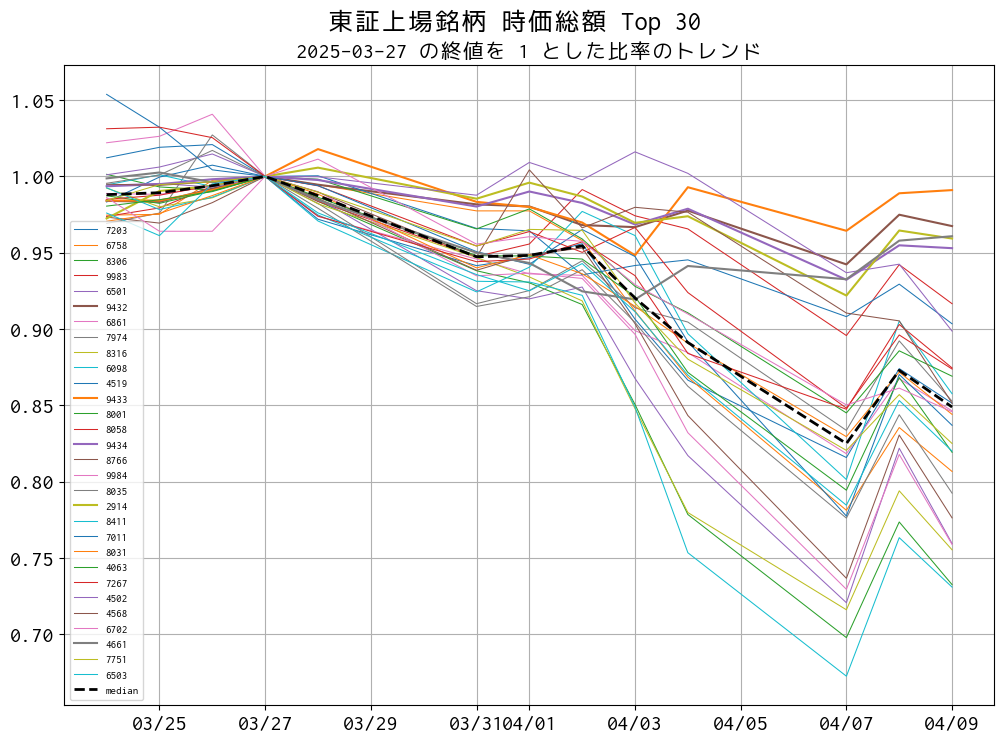

In [7]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.75
            lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [8]:
for code in ['9433', '9432', '4661', '2914', '9434']:
    get_code_into(code)
    print()

9433 KDDI Corporation
2025-04-07    0.964368
2025-04-08    0.988956
2025-04-09    0.991040
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-07    0.942334
2025-04-08    0.974898
2025-04-09    0.967436
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-07    0.932581
2025-04-08    0.957903
2025-04-09    0.960806
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-07    0.921916
2025-04-08    0.964551
2025-04-09    0.959281
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-07    0.932267
2025-04-08    0.954845
2025-04-09    0.952963
Name: Close, dtype: float64



In [9]:
summary

,7203,6758,8306,9983,6501,9432,6861,7974,8316,6098,...,7011,8031,4063,7267,4502,4568,6702,4661,7751,6503
2025-03-24,1.012197,0.974625,1.001377,0.973763,1.001070,0.984000,0.988840,0.969175,0.992379,0.994455,...,1.053786,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.975996
2025-03-25,1.019091,0.975142,0.993115,0.979355,1.006153,0.983333,0.988193,0.975975,0.980088,1.001085,...,1.032234,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,0.961185
2025-03-26,1.020859,0.997411,0.991049,0.993548,1.014714,0.992000,0.993692,1.027199,0.985988,0.993370,...,1.004310,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.983656,0.985554,0.994573,0.973799,0.982321,0.982036,0.970787,...,0.993978,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.947527,0.925094,0.981683,0.945819,0.916591,0.946856,0.924312,...,0.950696,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.955699,0.919743,0.980326,0.936115,0.925204,0.934132,0.940488,...,0.942416,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.991398,0.927501,0.968114,0.935145,0.944696,0.918413,0.977064,...,0.965186,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.974194,0.867576,0.966757,0.898916,0.913871,0.847804,0.961251,...,0.947497,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.965591,0.817014,0.977612,0.884522,0.904533,0.779691,0.896910,...,0.891607,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.869797


In [10]:
summary.tail(1).iloc[0]

7203    0.851359
6758    0.806594
8306    0.732447
9983    0.916559
6501    0.759363
9432    0.967436
6861    0.846353
7974    0.852675
8316    0.755240
6098    0.857557
4519    0.903395
9433    0.991040
8001    0.869036
8058    0.873728
9434    0.952963
8766    0.776178
9984    0.758750
8035    0.792394
2914    0.959281
8411    0.730805
7011    0.836846
8031    0.844023
4063    0.819158
7267    0.874473
4502    0.898612
4568    0.851362
6702    0.845693
4661    0.960806
7751    0.824943
6503    0.819917
Name: 2025-04-09 00:00:00, dtype: float64

In [11]:
summary.median(axis=1)

2025-03-24    0.988073
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.987381
2025-03-31    0.947327
2025-04-01    0.948237
2025-04-02    0.954477
2025-04-03    0.920286
2025-04-04    0.891153
2025-04-07    0.824919
2025-04-08    0.872879
2025-04-09    0.848856
dtype: float64